# AIOKraken Tutorial
For more information, please check http://github.com/asmodehn/aiokraken


In [1]:
%pip install -e .
from aiokraken.rest.client import RestClient
from aiokraken.rest.api import Server

Obtaining file:///opt/Projects/aiokraken
  Found existing installation: aiokraken 2.0.0
    Uninstalling aiokraken-2.0.0:
      Successfully uninstalled aiokraken-2.0.0
  Running setup.py develop for aiokraken
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
kraken = RestClient(Server())

In [3]:
await kraken.time()

/0/public/Time


Tue Oct  1 16:34:54 2019

In [4]:
# polling ohlc
ohlc = await kraken.ohlc(pair='XBTEUR')
print(ohlc.head())

         time    open    high     low   close    vwap      volume  count
0  1569897300  7695.0  7696.3  7693.5  7693.5  7694.5  1.39111977      9
1  1569897360  7693.5  7702.2  7693.5  7702.2  7699.9  0.17538776      3
2  1569897420  7702.2  7706.7  7702.2  7706.7  7706.7  0.12909887      1
3  1569897480  7707.9  7715.3  7707.9  7715.3  7711.8  0.06307351      5
4  1569897540  7715.3  7715.5  7712.7  7712.7  7715.3  0.41100000      4


         time    open    high     low   close    vwap       volume  count  \
0  1569898920  7739.9  7749.9  7739.9  7749.9  7749.4   7.51242619     20   
1  1569898980  7749.9  7749.9  7749.2  7749.9  7749.7   0.43242200     10   
2  1569899040  7749.4  7769.8  7749.4  7756.5  7752.7  32.59110242     94   
3  1569899100  7756.5  7766.4  7756.5  7766.4  7762.9   0.15629558     13   
4  1569899160  7766.4  7769.9  7766.2  7769.9  7769.6   7.88162112     28   

   MACD_12_26_9  MACDH_12_26_9  MACDS_12_26_9  
0           NaN            NaN            NaN  
1           NaN            NaN            NaN  
2           NaN            NaN            NaN  
3           NaN            NaN            NaN  
4           NaN            NaN            NaN  


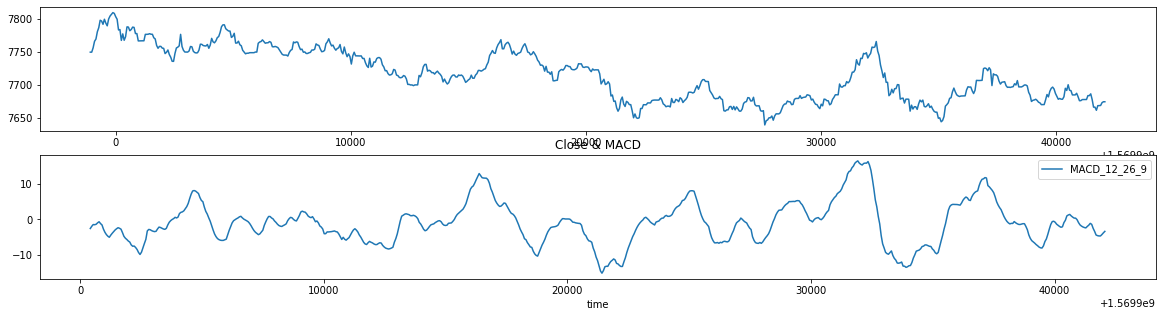

In [11]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import collections
import time
import asyncio
%matplotlib inline

# def live_plot(data_dict, figsize=(7,5), title=''):
#     clear_output(wait=True)
#     plt.figure(figsize=figsize)
#     for label,data in data_dict.items():
#         plt.plot(data, label=label)
#     plt.title(title)
#     plt.grid(True)
#     plt.xlabel('epoch')
#     plt.legend(loc='center left') # the plot evolves to the right
#     plt.show();
    
clear_output(wait=True)

ohlc_df = await kraken.ohlc(pair='XBTEUR') #since=ohlc.get('last'))
# convert what we want to draw to numeric to please mpl and others
ohlc_df.dataframe.close = pd.to_numeric(ohlc_df.dataframe.close)
#ohlc_df.time = pd.to_datetime(ohlc_df.time, unit='s')
#ohlc_df.dataframe.plot(x='time', y='close') 

# testing pandas TA
import pandas_ta as ta
ohlc_df.macd()
print(ohlc_df.head())

fig, ax = plt.subplots(2, 1, figsize=(20,5))

ax[0].plot(ohlc_df.dataframe.time, ohlc_df.dataframe.close, label='close')
ax[1].plot(ohlc_df.dataframe.time, ohlc_df.dataframe.MACD_12_26_9, label='MACD_12_26_9')

plt.xlabel('time')

plt.title("Close & MACD")

plt.legend()

plt.show()

#time.sleep(10.0)
#await asyncio.sleep(10.0)  # careful with rate limits...  # asyncio sleep allows other cells to run !?